## Data Loading 

In [1]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
base_path = "/kaggle/input/medvqa/R-RAD"
closed_end_test_path = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/closed-end/testset.json")
closed_end_train_path = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/closed-end/trainset.json")
open_end_test_path = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/open-end/testset.json")
open_end_train_path = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/open-end/trainset.json")
images_dir = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/images")

def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [3]:
closed_end_test = load_json(closed_end_test_path)
closed_end_train = load_json(closed_end_train_path)
open_end_test = load_json(open_end_test_path)
open_end_train = load_json(open_end_train_path)

In [4]:
def json_to_df(json_data, split_name):
    if isinstance(json_data, dict):
        data_list = [dict(item[1], id=item[0]) for item in json_data.items()]
    else:
        data_list = json_data
    df = pd.DataFrame(data_list)
    df['split'] = split_name
    return df

In [5]:
df_closed_test = json_to_df(closed_end_test, "test")
df_closed_train = json_to_df(closed_end_train, "train")
df_open_test = json_to_df(open_end_test, "test")
df_open_train = json_to_df(open_end_train, "train")

In [6]:
df_train = pd.concat([df_closed_train, df_open_train], ignore_index=True)
print("\n=== Training DataFrame Info (Closed + Open) ===")
df_train.info()


=== Training DataFrame Info (Closed + Open) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question       3064 non-null   object
 1   choices        3064 non-null   object
 2   answer         3064 non-null   int64 
 3   image          3064 non-null   object
 4   question_type  3064 non-null   object
 5   answer_type    3064 non-null   object
 6   image_organ    3064 non-null   object
 7   phrase_type    3064 non-null   object
 8   solution       3064 non-null   object
 9   id             3064 non-null   object
 10  split          3064 non-null   object
dtypes: int64(1), object(10)
memory usage: 263.4+ KB


In [7]:
df_train.head()

,question,choices,answer,image,question_type,answer_type,image_organ,phrase_type,solution,id,split
0,Are regions of the brain infarcted?,"[yes, no]",0,synpic54610.jpg,PRES,CLOSED,HEAD,freeform,The image provided is a Diffusion-Weighted Ima...,1,train
1,Are the lungs normal appearing?,"[yes, no]",1,synpic29265.jpg,ABN,CLOSED,CHEST,freeform,The provided chest x-ray shows some abnormalit...,2,train
2,Is there evidence of a pneumothorax?,"[yes, no]",1,synpic29265.jpg,PRES,CLOSED,CHEST,freeform,There is no visible evidence of a pneumothorax...,3,train
3,Is this a MRI of the chest?,"[yes, no]",1,synpic29265.jpg,MODALITY,CLOSED,CHEST,freeform,"This image is not an MRI, but instead it is a ...",5,train
4,Is the trachea midline?,"[yes, no]",0,synpic28602.jpg,PRES,CLOSED,CHEST,freeform,The trachea appears midline in the provided im...,7,train


In [8]:
df_test = pd.concat([df_closed_test, df_open_test], ignore_index=True)
print("\n=== Test DataFrame Info (Closed + Open) ===")
df_test.info()


=== Test DataFrame Info (Closed + Open) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question       451 non-null    object
 1   choices        451 non-null    object
 2   answer         451 non-null    int64 
 3   image          451 non-null    object
 4   question_type  451 non-null    object
 5   answer_type    451 non-null    object
 6   image_organ    451 non-null    object
 7   phrase_type    451 non-null    object
 8   solution       451 non-null    object
 9   id             451 non-null    object
 10  split          451 non-null    object
dtypes: int64(1), object(10)
memory usage: 38.9+ KB


In [9]:
df_test.head()

,question,choices,answer,image,question_type,answer_type,image_organ,phrase_type,solution,id,split
0,Is there evidence of an aortic aneurysm?,"[yes, no]",0,synpic42202.jpg,PRES,CLOSED,CHEST,freeform,The presence of a widened mediastinum on the X...,11,test
1,Is there airspace consolidation on the left side?,"[yes, no]",0,synpic29265.jpg,PRES,CLOSED,CHEST,freeform,"On the provided chest X-ray, there is evidence...",13,test
2,Is this an axial plane?,"[yes, no]",0,synpic54610.jpg,PLANE,CLOSED,HEAD,freeform,"An axial plane, also known as a transverse pla...",14,test
3,Is there vascular pathology in this image?,"[yes, no]",0,synpic54610.jpg,ABN,CLOSED,HEAD,freeform,The image provided is a diffusion-weighted MRI...,22,test
4,Is there cardiomyopathy?,"[yes, no]",0,synpic42202.jpg,SIZE,CLOSED,CHEST,freeform,The image provided is a chest X-ray showing an...,24,test


In [10]:
df_test = pd.concat([df_closed_test, df_open_test], ignore_index=True)
print("\n=== Test DataFrame Info (Closed + Open) ===")
df_test.info()


=== Test DataFrame Info (Closed + Open) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question       451 non-null    object
 1   choices        451 non-null    object
 2   answer         451 non-null    int64 
 3   image          451 non-null    object
 4   question_type  451 non-null    object
 5   answer_type    451 non-null    object
 6   image_organ    451 non-null    object
 7   phrase_type    451 non-null    object
 8   solution       451 non-null    object
 9   id             451 non-null    object
 10  split          451 non-null    object
dtypes: int64(1), object(10)
memory usage: 38.9+ KB


In [11]:
df_test.head()

,question,choices,answer,image,question_type,answer_type,image_organ,phrase_type,solution,id,split
0,Is there evidence of an aortic aneurysm?,"[yes, no]",0,synpic42202.jpg,PRES,CLOSED,CHEST,freeform,The presence of a widened mediastinum on the X...,11,test
1,Is there airspace consolidation on the left side?,"[yes, no]",0,synpic29265.jpg,PRES,CLOSED,CHEST,freeform,"On the provided chest X-ray, there is evidence...",13,test
2,Is this an axial plane?,"[yes, no]",0,synpic54610.jpg,PLANE,CLOSED,HEAD,freeform,"An axial plane, also known as a transverse pla...",14,test
3,Is there vascular pathology in this image?,"[yes, no]",0,synpic54610.jpg,ABN,CLOSED,HEAD,freeform,The image provided is a diffusion-weighted MRI...,22,test
4,Is there cardiomyopathy?,"[yes, no]",0,synpic42202.jpg,SIZE,CLOSED,CHEST,freeform,The image provided is a chest X-ray showing an...,24,test


## Train dataset Loading & Pre-Processing

In [12]:
def preprocess_image(row, images_dir, target_size=(512, 512)):
    image_path = os.path.join(images_dir, row["image"])
    try:
        image = Image.open(image_path)
        image = image.resize(target_size, Image.LANCZOS)
        image = image.convert("RGB")
        return image
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

In [13]:
df_train["image_processed"] = df_train.apply(lambda row: preprocess_image(row, images_dir), axis=1)

## Test Dataset Loading & Pre-Processing

In [14]:
def preprocess_image(row, images_dir, target_size=(512, 512)):
    image_path = os.path.join(images_dir, row["image"])
    try:
        image = Image.open(image_path)
        image = image.resize(target_size, Image.LANCZOS)
        image = image.convert("RGB")
        return image
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

In [15]:
df_test["image_processed"] = df_test.apply(lambda row: preprocess_image(row, images_dir), axis=1)

## Knowledge Graph

In [16]:
%pip install neo4j langchain langchain_openai langchain-community python-dotenv --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 7.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.2/437.2 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import dotenv
dotenv.load_dotenv('.env', override=True)

import os
from langchain_community.graphs import Neo4jGraph
os.environ.update({
    "NEO4J_URI": "neo4j+s://31d946a9.databases.neo4j.io",
    "NEO4J_USERNAME": "neo4j",
    "NEO4J_PASSWORD": "put your neo4j password here",
    "OPENAI_API_KEY": "put your openai api key here",
})
graph = Neo4jGraph(
    url=os.environ['NEO4J_URI'],
    username=os.environ['NEO4J_USERNAME'],
    password=os.environ['NEO4J_PASSWORD'],
)

/tmp/ipykernel_31/779782947.py:12: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  graph = Neo4jGraph(


In [18]:
import os
import json
import pandas as pd
from PIL import Image
from tqdm import tqdm
import traceback
import uuid

def create_constraints(neo4j_graph):
    """Creates constraints in Neo4j for the knowledge graph schema."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, skipping constraint creation.")
        return

    constraints_queries = [
        "CREATE CONSTRAINT IF NOT EXISTS FOR (img:Image) REQUIRE img.image_id IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (q:Question) REQUIRE q.text IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (sol:Solution) REQUIRE sol.text IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (org:Organ) REQUIRE org.name IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (cat:Category) REQUIRE cat.name IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (rat:Rationale) REQUIRE rat.text IS UNIQUE"
    ]
    print("Creating/Verifying Neo4j constraints...")

    created_count = 0
    skipped_count = 0
    error_count = 0
    for query in constraints_queries:
        try:
            neo4j_graph.query(query)
            print(f"  Executed: {query}")
            created_count += 1
        except Exception as e:
            if "already exists" in str(e).lower():
                print(f"  Skipped (already exists): {query}")
                skipped_count += 1
            else:
                print(f"  Error creating constraint: {e}. Query: {query}")
                error_count += 1
    print(f"Constraint setup complete. Executed/Verified: {created_count}, Skipped: {skipped_count}, Errors: {error_count}")

def _load_batch(records, neo4j_graph):
    """Loads a batch of records into Neo4j using the knowledge graph schema."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, skipping batch load.")
        return 0

    cypher_query = """
    UNWIND $records AS record
    MERGE (img:Image {image_id: record.image_id})
      ON CREATE SET img.filename = record.filename,
                    img.split = record.split,
                    img.organ = record.image_organ
    MERGE (q:Question {text: record.question})
      ON CREATE SET q.answer_type = record.answer_type
    MERGE (a:Answer {text: record.answer})
    MERGE (sol:Solution {text: record.solution})
    MERGE (org:Organ {name: record.image_organ})
    MERGE (cat:Category {name: record.answer_type})
    MERGE (img)-[:DEPICTS]->(org)
    MERGE (img)-[:HAS_QUESTION]->(q)
    MERGE (img)-[:HAS_ANSWER]->(a)
    MERGE (q)-[:BELONGS_TO]->(cat)
    MERGE (q)-[:HAS_ANSWER]->(a)
    MERGE (q)-[:REFERS_TO]->(img)
    MERGE (q)-[:HAS_SOLUTION]->(sol)
    """
    parameters = {"records": records}
    try:
        neo4j_graph.query(cypher_query, parameters)
        return len(records)
    except Exception as e:
        print(f"Error loading batch to Neo4j: {e}")
        if records:
            print(f"First record in failing batch: {records[0]}")
        traceback.print_exc()
        return 0

def count_question_types(neo4j_graph):
    """Counts the number of open and closed-ended questions in the knowledge graph."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, cannot count question types.")
        return

    query = """
    MATCH (q:Question)
    RETURN q.answer_type AS answer_type, COUNT(q) AS count
    """
    try:
        result = neo4j_graph.query(query)
        open_count = 0
        closed_count = 0
        for record in result:
            if record['answer_type'] == 'OPEN':
                open_count = record['count']
            elif record['answer_type'] == 'CLOSED':
                closed_count = record['count']
        print(f"Number of Open-Ended Questions: {open_count}")
        print(f"Number of Closed-Ended Questions: {closed_count}")
    except Exception as e:
        print(f"Error counting question types: {e}")

def load_data_to_kg(dataset_records, split_name, neo4j_graph, batch_size=100):
    """Loads dataset records into Neo4j knowledge graph."""
    if neo4j_graph is None:
        print(f"Neo4j graph not initialized, skipping data load for {split_name} split.")
        return
    if not dataset_records:
        print(f"No records found for {split_name} split. Skipping KG load.")
        return

    print(f"\nLoading {len(dataset_records)} records from {split_name} split into Neo4j...")
    total_loaded = 0
    batch = []
    for i, example in enumerate(tqdm(dataset_records, desc=f"Loading {split_name} data")):
        image_id = example.get('image_id', f"{split_name}_{uuid.uuid4()}")
        filename = example.get('image', 'unknown_image.jpg')
        question = example.get('question', 'Unknown question')
        choices = example.get('choices', [])
        answer = str(example.get('answer', 'Unknown answer'))
        answer_type = example.get('answer_type', 'unknown')
        image_organ = example.get('image_organ', 'unknown_organ')
        solution = example.get('solution', 'Unknown solution')

        record = {
            "image_id": image_id,
            "filename": filename,
            "question": str(question),
            "choices": choices,
            "answer": answer,
            "answer_type": answer_type,
            "image_organ": image_organ,
            "solution": str(solution),
            "split": split_name
        }
        batch.append(record)

        if len(batch) >= batch_size:
            loaded_count = _load_batch(batch, neo4j_graph)
            total_loaded += loaded_count
            batch = []

    if batch:
        loaded_count = _load_batch(batch, neo4j_graph)
        total_loaded += loaded_count

    print(f"Finished loading {split_name} split. Loaded: {total_loaded} records.")

required_columns = ['question', 'choices', 'answer', 'answer_type', 'image_organ', 'solution', 'image_processed']
df_train = df_train[required_columns]

# Convert training DataFrame to records for KG loading
train_records = df_train.to_dict(orient="records")

# Load data into KG (only training data by default)
if 'graph' in globals() and graph is not None:
    print("\nClearing existing graph data to avoid conflicts...")
    try:
        graph.query("MATCH (n) DETACH DELETE n")
        print("Graph data cleared.")
    except Exception as e:
        print(f"Warning: Failed to clear graph data: {e}")

    print("\nLoading training data into Knowledge Graph...")
    create_constraints(graph)
    load_data_to_kg(train_records, "train", graph)
    count_question_types(graph)

    # Refresh schema after loading
    print("\nRefreshing KG schema...")
    try:
        graph.refresh_schema()
        print("\nCurrent KG schema:")
        print(graph.schema)
    except Exception as e:
        print(f"Error refreshing schema: {e}")
else:
    print("\nSkipping KG data loading (Neo4j graph unavailable).")


Clearing existing graph data to avoid conflicts...

Loading training data into Knowledge Graph...
Creating/Verifying Neo4j constraints...
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (img:Image) REQUIRE img.image_id IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (q:Question) REQUIRE q.text IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (sol:Solution) REQUIRE sol.text IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (org:Organ) REQUIRE org.name IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (cat:Category) REQUIRE cat.name IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (rat:Rationale) REQUIRE rat.text IS UNIQUE
Constraint setup complete. Executed/Verified: 6, Skipped: 0, Errors: 0

Loading 3064 records from train split into Neo4j...


Loading train data: 100%|██████████| 3064/3064 [00:13<00:00, 226.54it/s]


Finished loading train split. Loaded: 3064 records.
Number of Open-Ended Questions: 879
Number of Closed-Ended Questions: 1524

Refreshing KG schema...

Current KG schema:
Node properties:
Image {image_id: STRING, filename: STRING, split: STRING, organ: STRING, embedding: LIST}
Question {text: STRING, answer_type: STRING, embedding: LIST}
Solution {text: STRING}
Organ {name: STRING}
Category {name: STRING}
Answer {text: STRING}
Relationship properties:

The relationships:
(:Image)-[:DEPICTS]->(:Organ)
(:Image)-[:HAS_QUESTION]->(:Question)
(:Image)-[:HAS_ANSWER]->(:Answer)
(:Question)-[:HAS_ANSWER]->(:Answer)
(:Question)-[:BELONGS_TO]->(:Category)
(:Question)-[:REFERS_TO]->(:Image)
(:Question)-[:HAS_SOLUTION]->(:Solution)


Neo4j connection verified. Total nodes in database: 36827
Fetched 20 relationships from Neo4j.
Graph constructed with 19 nodes and 20 edges.
Visualization saved as kg_visualization.png (check Kaggle output files).


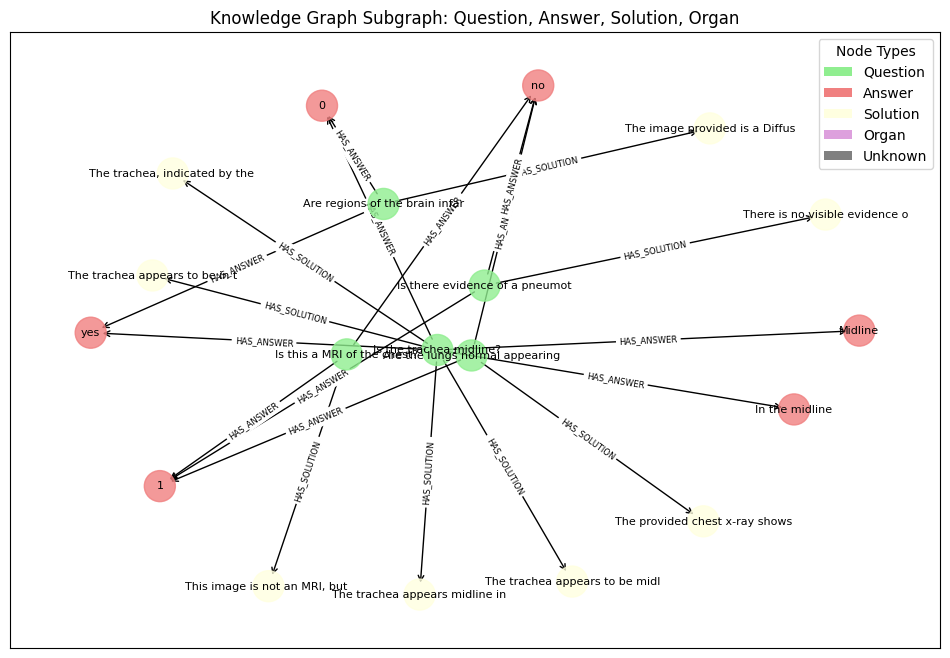

Visualization displayed inline.


In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from langchain_community.graphs import Neo4jGraph

# Ensure matplotlib inline for Kaggle
%matplotlib inline

def visualize_kg(neo4j_graph, max_nodes=10, output_file="kg_visualization.png"):
    """Visualizes a subgraph of the Neo4j knowledge graph in Kaggle, limited to Question, Answer, Solution, and Organ nodes."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, cannot visualize.")
        return

    # Verify Neo4j connection
    try:
        result = neo4j_graph.query("MATCH (n) RETURN count(n) AS count")
        print(f"Neo4j connection verified. Total nodes in database: {result[0]['count']}")
    except Exception as e:
        print(f"Neo4j connection failed: {e}")
        return

    # Query to fetch a sample of nodes and relationships for Question, Answer, Solution, and Organ
    query = """
    MATCH (n)-[r]->(m)
    WHERE labels(n) IN [['Question'], ['Answer'], ['Solution'], ['Organ']]
    AND labels(m) IN [['Question'], ['Answer'], ['Solution'], ['Organ']]
    RETURN labels(n) AS source_labels, n AS source, type(r) AS rel_type, labels(m) AS target_labels, m AS target
    LIMIT $limit
    """
    try:
        # Fetch data with a limit
        result = neo4j_graph.query(query, {"limit": max_nodes * 2})
        print(f"Fetched {len(result)} relationships from Neo4j.")

        if not result:
            print("No data returned from Neo4j query. Check database content or query.")
            return

        # Initialize networkx directed graph
        G = nx.DiGraph()

        # Process nodes and relationships
        for record in result:
            # Extract source node
            source = record['source']
            source_labels = record['source_labels']  # List of labels
            source_label = source_labels[0] if source_labels else 'Unknown'  # Primary label
            source_id = source.get('text', str(source)) if source_label in ['Question', 'Answer', 'Solution'] else \
                        source.get('name', str(source)) if source_label == 'Organ' else str(source)
            source_id = str(source_id)[:30]  # Truncate for readability

            # Extract target node
            target = record['target']
            target_labels = record['target_labels']
            target_label = target_labels[0] if target_labels else 'Unknown'
            target_id = target.get('text', str(target)) if target_label in ['Question', 'Answer', 'Solution'] else \
                        target.get('name', str(target)) if target_label == 'Organ' else str(target)
            target_id = str(target_id)[:30]  # Truncate for readability

            # Extract relationship type
            rel_type = record['rel_type']

            # Add nodes with label attribute
            G.add_node(source_id, label=source_label)
            G.add_node(target_id, label=target_label)

            # Add edge
            G.add_edge(source_id, target_id, relationship=rel_type)

        if not G.nodes:
            print("No nodes added to the graph. Check query results or data format.")
            return

        print(f"Graph constructed with {len(G.nodes)} nodes and {len(G.edges)} edges.")

        # Define node colors based on label
        node_colors = {
            'Question': 'lightgreen',
            'Answer': 'lightcoral',
            'Solution': 'lightyellow',
            'Organ': 'plum',
            'Unknown': 'grey'
        }

        # Get node colors for visualization
        colors = [node_colors.get(G.nodes[node]['label'], 'grey') for node in G.nodes]

        # Set up the plot
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(G, k=0.5, iterations=50)  # Layout for visualization

        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=500, alpha=0.8)

        # Draw edges
        nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10)

        # Draw node labels
        nx.draw_networkx_labels(G, pos, font_size=8)

        # Draw edge labels
        edge_labels = {(u, v): d['relationship'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

        # Add a legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=color, label=label) for label, color in node_colors.items()]
        plt.legend(handles=legend_elements, loc='upper right', title='Node Types')

        # Set title
        plt.title("Knowledge Graph Subgraph: Question, Answer, Solution, Organ")

        # Save as a fallback in Kaggle
        plt.savefig(output_file)
        print(f"Visualization saved as {output_file} (check Kaggle output files).")

        # Display inline
        plt.show()
        print("Visualization displayed inline.")

    except Exception as e:
        print(f"Error visualizing knowledge graph: {e}")
        traceback.print_exc()

# Call the function to visualize the graph
try:
    visualize_kg(graph, max_nodes=10)
except NameError:
    print("Error: 'graph' object not defined. Ensure Neo4jGraph is initialized.")

## Embeddings --> for RAG

In [20]:
import os
import io
import dotenv
import numpy as np
import torch
from PIL import Image
from tqdm import tqdm
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel

2025-04-26 23:05:48.870425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745708749.061610      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745708749.115157      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model_name = "openai/clip-vit-large-patch14"
processor = CLIPProcessor.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained(model_name).to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [22]:
def get_image_embedding(image_data):
    """
    Extracts CLIP image embedding, ensuring the input is a PIL Image.
    Handles cases where image_data may be a dict, file path, or already a PIL Image.
    Assumes 'processor' and 'model' are globally available.
    """
    if processor is None or model is None:
        print("CLIP model not loaded, cannot get image embedding.")
        return None

    # If image_data is a dict, try to extract the actual image
    if isinstance(image_data, dict):
        if "pil_image" in image_data and isinstance(image_data["pil_image"], Image.Image):
            image = image_data["pil_image"]
        elif "image" in image_data and isinstance(image_data["image"], Image.Image):
            image = image_data["image"]
        elif "bytes" in image_data:
            try:
                image = Image.open(io.BytesIO(image_data["bytes"])).convert("RGB")
            except Exception as e:
                print(f"Error opening image from bytes: {e}")
                return None
        else:
            # print("Unsupported image dict structure: keys found are {}".format(list(image_data.keys())))
            return None # Indicate failure
    else:
        image = image_data

    # If it's a file path (string), open it
    if isinstance(image, str):
        try:
            image = Image.open(image).convert("RGB")
        except FileNotFoundError:
            print(f"Image file not found: {image}")
            return None
        except Exception as e:
            print(f"Error opening image file {image}: {e}")
            return None

    if not isinstance(image, Image.Image):
        # print("Image is not in a supported format. Got type: {}".format(type(image)))
        return None # Indicate failure

    # Preprocess the image and extract embeddings
    try:
        inputs = processor(images=image, return_tensors="pt").to(device)
        with torch.no_grad():
            image_embedding = model.get_image_features(**inputs)
        return image_embedding.cpu().numpy().flatten()
    except Exception as e:
        print(f"Error processing image for embedding: {e}")
        traceback.print_exc()
        return None

In [23]:
def get_text_embedding(question, answer):
    """
    Extracts CLIP text embedding using a combined string of question and answer.
    Assumes 'processor' and 'model' are globally available.
    """
    if processor is None or model is None:
        print("CLIP model not loaded, cannot get text embedding.")
        return None
    try:
        text = f"Q: {question} A: {answer}"
        inputs = processor(text=[text], return_tensors="pt").to(device)
        with torch.no_grad():
            text_embedding = model.get_text_features(**inputs)
        return text_embedding.cpu().numpy().flatten()
    except Exception as e:
        print(f"Error processing text for embedding: {e}")
        traceback.print_exc()
        return None

In [24]:
def get_query_text_embedding(query_text):
    """
    Encode a text query using CLIP to obtain its embedding.
    Assumes 'processor' and 'model' are globally available.
    """
    if processor is None or model is None:
        print("CLIP model not loaded, cannot get query text embedding.")
        return None
    try:
        inputs = processor(text=[query_text], return_tensors="pt").to(device)
        with torch.no_grad():
            text_embedding = model.get_text_features(**inputs)
        return text_embedding.cpu().numpy().flatten()
    except Exception as e:
        print(f"Error processing query text for embedding: {e}")
        traceback.print_exc()
        return None

In [25]:
train_image_embeddings = []
train_text_embeddings = []
train_metadata = []

In [26]:
if 'train_records' in globals() and train_records:
    print(f"Processing {len(train_records)} training records for embeddings...")
    for i, record in enumerate(tqdm(train_records, desc="Creating Embeddings")):
        try:
            # Use the image_id that was determined for this record during KG load prep
            # This ensures the metadata linkage matches the KG entries.
            image_id = record.get('image_id') # This should be the ID used in KG

            # Use the 'image_processed' data from the record for image embedding
            image_data_for_embedding = record.get('image_processed')

            image_embedding = get_image_embedding(image_data_for_embedding)
            if image_embedding is None:
                 print(f"Skipping embedding for record {i} (image_id: {image_id}) due to image processing error or missing data.")
                 continue # Skip this record if image embedding failed


            text_embedding = get_text_embedding(record.get('question', ''), record.get('answer', '')) # Use .get for safety
            if text_embedding is None:
                 print(f"Skipping embedding for record {i} (image_id: {image_id}) due to text processing error.")
                 continue # Skip if text embedding failed

            train_image_embeddings.append(image_embedding)
            train_text_embeddings.append(text_embedding)
            # Store the image_id that went into the KG along with metadata
            train_metadata.append({"image_id": image_id, "question": record.get('question'), "answer": record.get('answer')})

        except Exception as e:
            print(f"Error processing record {i} (image_id: {record.get('image_id', 'N/A')}) for embedding: {e}")
            traceback.print_exc()
            continue # Continue to the next record

    # Convert lists to numpy arrays *after* processing
    if train_image_embeddings:
        train_image_embeddings = np.array(train_image_embeddings)
    else:
        train_image_embeddings = np.array([]) # Empty array if no embeddings were successful

    if train_text_embeddings:
        train_text_embeddings = np.array(train_text_embeddings)
    else:
        train_text_embeddings = np.array([]) # Empty array if no embeddings were successful

Processing 3064 training records for embeddings...


Creating Embeddings: 100%|██████████| 3064/3064 [02:42<00:00, 18.86it/s]


In [27]:
    if train_image_embeddings.size > 0:
        np.save("train_image_embeddings.npy", train_image_embeddings)
        print(f"Saved train_image_embeddings.npy with shape {train_image_embeddings.shape}")
    else:
        print("No image embeddings created, skipping saving train_image_embeddings.npy")

    if train_text_embeddings.size > 0:
        np.save("train_text_embeddings.npy", train_text_embeddings)
        print(f"Saved train_text_embeddings.npy with shape {train_text_embeddings.shape}")
    else:
         print("No text embeddings created, skipping saving train_text_embeddings.npy")


    if train_metadata:
         # Save metadata, ensuring it can be loaded correctly (dtype=object or structured array)
         # Using allow_pickle=True is necessary for saving list of dicts
         try:
             np.save("train_metadata.npy", np.array(train_metadata, dtype=object), allow_pickle=True)
             print(f"Saved train_metadata.npy with {len(train_metadata)} records.")
         except Exception as e:
             print(f"Error saving train_metadata.npy: {e}")
    else:
        print("No metadata collected, skipping saving train_metadata.npy")

Saved train_image_embeddings.npy with shape (3064, 768)
Saved train_text_embeddings.npy with shape (3064, 768)
Saved train_metadata.npy with 3064 records.


In [28]:
# test_image_embeddings = []
# test_text_embeddings = []
# test_metadata = []

In [29]:
# for _, row in tqdm(df_test.iterrows(), total=len(df_test), desc="Processing Test Data"):
#     image_embedding = get_image_embedding(row["image"])
#     text_embedding = get_text_embedding(row["question"], row["answer"])

#     test_image_embeddings.append(image_embedding)
#     test_text_embeddings.append(text_embedding)
#     test_metadata.append({"question": row["question"], "answer": row["answer"]})

# test_image_embeddings = np.array(test_image_embeddings)
# test_text_embeddings = np.array(test_text_embeddings)

In [30]:
# np.save("test_image_embeddings.npy", test_image_embeddings)
# np.save("test_text_embeddings.npy", test_text_embeddings)
# np.save("test_metadata.npy", np.array(test_metadata, dtype=object))

In [31]:
!pip install faiss-cpu --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 61.0 MB/s eta 0:00:00:00:0100:01


In [32]:
import faiss

# Create a FAISS index for text embeddings
index_text = None  # Initialize index_text outside the if block
if train_text_embeddings.size > 0:
    dim_text = train_text_embeddings.shape[1]
    index_text = faiss.IndexFlatL2(dim_text)  # L2 distance index for simplicity
    index_text.add(train_text_embeddings)
    faiss.write_index(index_text, "train_text_index.faiss")
    print("Created and saved train_text_index.faiss")
else:
    print("Skipping train_text_index.faiss creation due to empty text embeddings.")

# Create a FAISS index for image embeddings
index_image = None  # Initialize index_image outside the if block
if train_image_embeddings.size > 0:
    dim_img = train_image_embeddings.shape[1]
    index_image = faiss.IndexFlatL2(dim_img)
    index_image.add(train_image_embeddings)
    faiss.write_index(index_image, "train_image_index.faiss")
    print("Created and saved train_image_index.faiss")
else:
    print("Skipping train_image_index.faiss creation due to empty image embeddings.")

print("Embedding and FAISS indexing process complete.")

# Checking that the images and text are embedded correctly
if train_image_embeddings.size > 0:
    print("Train Image Embeddings Shape:", train_image_embeddings.shape)
if train_text_embeddings.size > 0:
    print("Train Text Embeddings Shape:", train_text_embeddings.shape)
print("Train Metadata Count:", len(train_metadata))

Created and saved train_text_index.faiss
Created and saved train_image_index.faiss
Embedding and FAISS indexing process complete.
Train Image Embeddings Shape: (3064, 768)
Train Text Embeddings Shape: (3064, 768)
Train Metadata Count: 3064


In [33]:
# checking that the imgs and text are embedded correctly
print("Train Image Embeddings Shape:", np.array(train_image_embeddings).shape)
print("Train Text Embeddings Shape:", np.array(train_text_embeddings).shape)

Train Image Embeddings Shape: (3064, 768)
Train Text Embeddings Shape: (3064, 768)


## Integrating RAG with KG

In [34]:
def get_kg_context_by_image_id(image_id, neo4j_graph):
    """
    Given a KG image_id, retrieve the corresponding context (Image, Question, and Answer) from Neo4j.
    """
    if neo4j_graph is None:
        print("Neo4j graph not initialized, cannot fetch KG context.")
        return None

    # Use parameters to avoid injection issues and handle quotes in image_id
    cypher_query = """
    MATCH (img:Image {image_id: $image_id})-[:HAS_QUESTION]->(q:Question)-[:HAS_ANSWER]->(a:Answer)
    RETURN img.image_id AS image_id, q.text AS question, a.text AS answer
    """
    parameters = {"image_id": image_id}

    try:
        result = neo4j_graph.query(cypher_query, parameters)
        if result:
            # The query should return a list of records. Assuming image_id is unique, there should be at most one.
            return result[0] # Return the first match as a dictionary-like object
        else:
            return None # No match found
    except Exception as e:
        print(f"Error retrieving KG context for image_id {image_id}: {e}")
        traceback.print_exc()
        return None

# --- Code to edit: Demonstrate Retrieval ---

# This block demonstrates how to use the functions to query based on text similarity and retrieve KG context.

print("\n--- Demonstrating Text Similarity Search and KG Context Retrieval ---")

# Load the saved metadata and FAISS index if they exist
loaded_train_metadata = []
metadata_file = "train_metadata.npy"
if os.path.exists(metadata_file):
    try:
        loaded_train_metadata = np.load(metadata_file, allow_pickle=True).tolist()
        print(f"Loaded {len(loaded_train_metadata)} records from {metadata_file}")
    except Exception as e:
        print(f"Error loading {metadata_file}: {e}")
        loaded_train_metadata = [] # Clear in case of partial load or corruption
else:
    print(f"{metadata_file} not found. Cannot retrieve KG context by index.")


# Load the FAISS text index
loaded_index_text = None
index_file = "train_text_index.faiss"
if os.path.exists(index_file):
    try:
        import faiss
        loaded_index_text = faiss.read_index(index_file)
        print(f"Loaded {index_file}")
    except ImportError:
        print("FAISS library not found. Cannot load FAISS index.")
    except Exception as e:
        print(f"Error loading {index_file}: {e}")
        loaded_index_text = None
else:
    print(f"{index_file} not found. Cannot perform similarity search.")


--- Demonstrating Text Similarity Search and KG Context Retrieval ---
Loaded 3064 records from train_metadata.npy
Loaded train_text_index.faiss


In [35]:
if loaded_index_text is not None and loaded_train_metadata and 'graph' in globals() and graph is not None:
    print("\nReady to perform similarity search and KG retrieval.")

    # Define a sample query text
    query_text = "Are regions of the brain infarcted?"

    # Define a function to retrieve similar records using the loaded index
    def retrieve_similar_records_loaded(query_text, index, k=5):
        """
        Retrieve the top k similar QA pairs based on the query text using a loaded index.
        Returns the indices (which correspond to the training records)
        and the distances.
        Assumes 'processor' and 'model' are globally available for get_query_text_embedding.
        """
        if index is None:
            print("FAISS index is not loaded, cannot retrieve similar records.")
            return [], []

        query_embedding = get_query_text_embedding(query_text)
        if query_embedding is None:
             print("Failed to get query text embedding.")
             return [], []

        query_embedding = np.expand_dims(query_embedding, axis=0)
        try:
            distances, indices = index.search(query_embedding, k)
            return indices[0], distances[0] # Return the indices and distances from the search result
        except Exception as e:
            print(f"Error during FAISS search: {e}")
            traceback.print_exc()
            return [], [] # Return empty lists in case of error


    # Retrieve similar records based on the query text
    k = 5 # Number of similar records to retrieve
    print(f"Searching for top {k} similar text embeddings for query: '{query_text}'")
    similar_indices, distances = retrieve_similar_records_loaded(query_text, loaded_index_text, k=k)

    print("\nSimilar Records Found (from FAISS index):")
    if similar_indices.size > 0:
        for i, (index, distance) in enumerate(zip(similar_indices, distances)):
            print(f"Rank {i+1}: Index {index}, Distance {distance:.4f}")

            # Check if the index is valid for the loaded metadata
            if 0 <= index < len(loaded_train_metadata):
                # Get the corresponding image_id from the metadata using the index
                record_metadata = loaded_train_metadata[index]
                image_id_from_metadata = record_metadata.get('image_id')
                original_question = record_metadata.get('question', 'N/A')
                original_answer = record_metadata.get('answer', 'N/A')

                print(f"  -> Mapped to image_id: {image_id_from_metadata}")
                print(f"  -> Original QA (from metadata): Q: {original_question} A: {original_answer}")

                if image_id_from_metadata:
                    # Retrieve KG context using the actual image_id from metadata
                    kg_context = get_kg_context_by_image_id(image_id_from_metadata, graph)

                    if kg_context:
                        print("  -> KG Context (retrieved from Neo4j):")
                        # Access results safely using .get()
                        print(f"     Image ID: {kg_context.get('image_id', 'N/A')}")
                        print(f"     Question: {kg_context.get('question', 'N/A')}")
                        print(f"     Answer:   {kg_context.get('answer', 'N/A')}")
                    else:
                        print(f"  -> No KG context found in Neo4j for image_id: {image_id_from_metadata}")
                else:
                     print(f"  -> Warning: No image_id found in metadata for index {index}. Cannot query KG.")
            else:
                print(f"  -> Warning: Retrieved index {index} is out of bounds for loaded metadata ({len(loaded_train_metadata)} items). Skipping KG lookup.")

    else:
        print("No similar records found.")

else:
    print("\nSkipping similarity search and KG retrieval because necessary components are not available:")
    if loaded_index_text is None:
        print("- FAISS text index not loaded (train_text_index.faiss missing or failed to load).")
    if not loaded_train_metadata:
        print("- Training metadata not loaded or is empty (train_metadata.npy missing or failed to load).")
    if 'graph' not in globals() or graph is None:
        print("- Neo4j graph object is not available or is None (ensure KG initialization was successful).")
    if processor is None or model is None:
        print("- CLIP model not loaded.")


Ready to perform similarity search and KG retrieval.
Searching for top 5 similar text embeddings for query: 'Are regions of the brain infarcted?'

Similar Records Found (from FAISS index):
Rank 1: Index 0, Distance 33.3653
  -> Mapped to image_id: None
  -> Original QA (from metadata): Q: Are regions of the brain infarcted? A: 0
  -> Warning: No image_id found in metadata for index 0. Cannot query KG.
Rank 2: Index 2205, Distance 100.1141
  -> Mapped to image_id: None
  -> Original QA (from metadata): Q: In which area of the brain are the infarcts found? A: 0
  -> Warning: No image_id found in metadata for index 2205. Cannot query KG.
Rank 3: Index 2121, Distance 101.2207
  -> Mapped to image_id: None
  -> Original QA (from metadata): Q: What region of the brain shows hyperintensity? A: 0
  -> Warning: No image_id found in metadata for index 2121. Cannot query KG.
Rank 4: Index 2501, Distance 103.6514
  -> Mapped to image_id: None
  -> Original QA (from metadata): Q: Which region of t

## Integrating a reasoning LLM for answer generation

In [36]:
!pip install google-generativeai python-dotenv pydicom pillow --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [37]:
!pip install bert_score --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.8 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is inc

In [ ]:
import os
import google.generativeai as genai
from datasets import load_dataset
from PIL import Image
import time

import os
import google.generativeai as genai
from datasets import load_dataset
from PIL import Image
import time

# Direct API configuration
GEMINI_API_KEY = "put your gemini api key here"

# Configure with API key
genai.configure(api_key=GEMINI_API_KEY)

In [ ]:
import google.generativeai as genai
import time
import pandas as pd 
import os
from PIL import Image 
from tqdm import tqdm 
import traceback
import textwrap 



def analyze_medical_image_with_rag(image, question, answer_type, retrieved_context, model):
    """
    Medical analysis using Gemini with RAG context from similar questions.
    Uses a loaded FAISS index and metadata to find similar questions and
    retrieves corresponding context from the Neo4j graph.
    Takes pre-retrieved context and answer_type as input.
    """

    system_instruction = "You are an expert medical visual question answering assistant."

    answer_format_instruction = ""
    if answer_type and answer_type.upper() == "CLOSED":
        answer_format_instruction = "Your final answer MUST be ONLY 'yes' or 'no'."
    elif answer_type and answer_type.upper() == "OPEN":
         answer_format_instruction = "Your final answer should be a concise medical description using precise medical terminology."
    else:
         answer_format_instruction = "Your final answer should be a concise medical description." # Default for unknown type


    user_prompt_text = f"""Your task is to answer the user's query about the provided medical image. Use the provided context from similar past cases (including questions and answers) to inform your answer, but prioritize analysis of the medical image itself. Do NOT hallucinate or provide information not supported by the image or the context.

Context from similar retrieved cases:
--- Start Context ---
{retrieved_context if retrieved_context else 'No similar context cases were found.'}
--- End Context ---

User Query about the medical image:
{question}

Reasoning Steps to follow:
1.  **Examine the Medical Image:** Analyze the provided image for relevant findings, pathology, or anatomical structures related to the user's query.
2.  **Analyze Retrieved Context:** Carefully examine the Questions and Answers from the context cases. Look for patterns, relevant findings, or common answers related to the user's query type and findings in the image.
3.  **Synthesize Information:** Based on your analysis of the image AND the information from the provided context cases, formulate a reasoned answer to the user's query.
4.  **Final Answer:** Generate a concise and direct answer to the user's query, ensuring it is fully grounded in the image and supported by the provided context. {answer_format_instruction}

Final Answer:
"""

    prompt_parts = [
        system_instruction,
        user_prompt_text,
        image 
    ]

    try:
        response = model.generate_content(prompt_parts)
        return response.text
    except Exception as e:
        print(f"Error generating content from Gemini: {e}")
        return f"Error during generation: {str(e)}"

def test_gemini_medical_vqa_with_rag(test_dataset_df, max_samples=None, loaded_index=None, loaded_metadata=None, neo4j_graph=None):
    """
    Evaluates Gemini Medical VQA with RAG by iterating through test samples in a DataFrame.
    Includes rate limiting and saves results to CSV.
    test_dataset_df is expected to be a pandas DataFrame with 'image_processed', 'question', 'answer', and 'answer_type' columns.
    Prints results for each step.
    """
    results = []
    num_samples_to_run = max_samples if max_samples is not None else len(test_dataset_df)
    answer_count = 0

    try:
        model = genai.GenerativeModel('gemini-2.0-flash')
        print("Gemini model initialized successfully.")
    except Exception as e:
        print(f"FATAL Error initializing Gemini model: {e}")
        traceback.print_exc()
        print("Skipping test execution due to model initialization failure.")
        return []


    rag_available = loaded_index is not None and loaded_metadata is not None and neo4j_graph is not None
    if not rag_available:
        print("Warning: RAG components (index, metadata, or graph) not fully loaded. RAG may not function correctly.")
        print("Proceeding with testing, but RAG functionality will be limited or absent.")


    print(f"\nStarting evaluation on {num_samples_to_run} samples...")

    for idx in tqdm(range(num_samples_to_run), desc="Evaluating Gemini with RAG"):
        question = "N/A"
        true_answer = "N/A"
        answer_type = "N/A"
        pred_answer = "ERROR: Processing failed"
        match = False
        example = None 
        retrieved_context = ""
        try:
            if idx >= len(test_dataset_df):
                 print(f"Warning: Index {idx} is out of bounds for test_dataset_df ({len(test_dataset_df)} items). Stopping.")
                 break

            example = test_dataset_df.iloc[idx] 

            img = example.get("image_processed")
            question = example.get("question", "N/A")
            answer_type = example.get("answer_type", "N/A") 

            
            true_answer_raw = example.get("answer", "N/A")
            true_answer = str(true_answer_raw).lower()


            if img is None or not isinstance(img, Image.Image):
                print(f"\n--- Case {idx+1} ---")
                print(f"Skipping case {idx} due to invalid or missing image in 'image_processed' column: {type(img)}")
                print("--------------------")
                pred_answer = f"ERROR: Invalid or missing image type {type(img)}"
                # Log the error and continue
                results.append({
                    "case": idx+1,
                    "question": question,
                    "true_answer": true_answer, 
                    "answer_type": answer_type,
                    "pred_answer": pred_answer,
                    "match": False,
                    "retrieved_context": "" 
                })
                continue 

            if rag_available:
                try:
                    retrieved_indices, distances = retrieve_similar_records_loaded(question, loaded_index, k=3) # Retrieve top 3

                    context_pieces = []
                    for r_idx in retrieved_indices:
                         if 0 <= r_idx < len(loaded_metadata):
                             record_metadata = loaded_metadata[r_idx]
                             image_id_from_metadata = record_metadata.get('image_id')

                             if image_id_from_metadata:
                                 kg_context = get_kg_context_by_image_id(image_id_from_metadata, neo4j_graph)
                                 if kg_context:
                                     sim_q = kg_context.get('question', 'N/A')
                                     sim_a = kg_context.get('answer', 'N/A')
                                     context_pieces.append(f"Similar Case (Image ID: {image_id_from_metadata}):\n Question: {sim_q}\n Answer: {sim_a}")
                    retrieved_context = "\n\n".join(context_pieces)

                except Exception as rag_e:
                    print(f"\nError during RAG retrieval for case {idx}: {rag_e}")
                    traceback.print_exc()
                    retrieved_context = f"Error retrieving RAG context: {rag_e}" # Indicate error in context
            else:
                 retrieved_context = "RAG components not available. No context retrieved."


            # --- Generate Answer using LLM with Hybrid Context ---
            pred_answer_raw = analyze_medical_image_with_rag(img, question, answer_type, retrieved_context, model)
            pred_answer = str(pred_answer_raw).lower()


            answer_count += 1

            if answer_count % 2 == 0:
                 print(f"\nGenerated {answer_count} answers. Pausing for 60 seconds to respect API rate limits...")
                 time.sleep(60)
                 print("Resuming...")


            match = true_answer in pred_answer if true_answer != "N/A" else False

            print(f"\n--- Case {idx+1} (Type: {answer_type}) ---")
            print(f"Question: {question}")
            print(f"True Answer: {true_answer}")
            wrapped_pred_answer = textwrap.fill(pred_answer, width=100)
            print(f"Predicted Answer: {wrapped_pred_answer}")
            print(f"Match: {match}")
            print("--------------------")

            print("Retrieved Context (for this case):\n", retrieved_context) 


            results.append({
                "case": idx+1,
                "question": question,
                "true_answer": true_answer,
                "answer_type": answer_type,
                "pred_answer": pred_answer,
                "match": match,
                "retrieved_context": retrieved_context 
            })

        except Exception as e:
            print(f"\nAn unexpected error occurred on case {idx}: {str(e)}")
            traceback.print_exc()
            current_question = example.get("question", "N/A") if example is not None else "N/A"
            current_answer_type = example.get("answer_type", "N/A") if example is not None else "N/A"
            current_true_answer_raw = example.get("answer", "N/A") if example is not None else "N/A"
            current_true_answer = str(current_true_answer_raw).lower()

            print(f"\n--- Case {idx+1} (Type: {current_answer_type}, Error) ---")
            print(f"Question: {current_question}")
            print(f"True Answer: {current_true_answer}")
            print(f"Predicted Answer: FATAL ERROR: {str(e)}")
            print(f"Match: False")
            print("---------------------------")


            results.append({
                "case": idx+1,
                "question": current_question,
                "true_answer": current_true_answer,
                "answer_type": current_answer_type,
                "pred_answer": f"FATAL ERROR: {str(e)}",
                "match": False,
                "retrieved_context": retrieved_context # Store the context retrieved before the error
            })

    print("\nEvaluation complete.")
    return results

if 'df_test' not in globals() or not isinstance(df_test, pd.DataFrame) or df_test.empty:
    print("\nSkipping test execution: df_test not found, is not a DataFrame, or is empty.")
    test_results_rag = []
else:
    if 'loaded_index_text' not in globals() or 'loaded_train_metadata' not in globals() or 'graph' not in globals():
         print("\nWarning: RAG components (loaded_index_text, loaded_train_metadata, or graph) are not available.")
         print("Proceeding with testing, but RAG functionality will be limited or absent.")
         loaded_index_text = None
         loaded_train_metadata = None
         graph = None

    test_results_rag = test_gemini_medical_vqa_with_rag(
        test_dataset_df=df_test, 
        max_samples=len(df_test),
        loaded_index=loaded_index_text, 
        loaded_metadata=loaded_train_metadata, 
        neo4j_graph=graph 
    )

print("\n\n--- Medical VQA Summary Results with RAG ---")
print(f"{'Case':<5} | {'Type':<5} | {'Question':<70} | {'True Answer':<20} | {'Prediction (RAG)':<70} | {'Match':<5}")
print("-" * 220) 
if test_results_rag:
    for res in test_results_rag:
        question_str = res['question'][:67] + '...' if len(res['question']) > 70 else res['question']
        true_answer_str = res['true_answer'][:17] + '...' if len(res['true_answer']) > 20 else res['true_answer']
        pred_answer_str = res['pred_answer'][:67] + '...' if len(res['pred_answer']) > 70 else res['pred_answer']
        answer_type_str = res['answer_type'][:5] # Truncate answer_type if needed
        print(f"{res['case']:<5} | {answer_type_str:<5} | {question_str:<70} | {true_answer_str:<20} | {pred_answer_str:<70} | {str(res['match']):<5}")
else:
    print("No test results to display in summary.")


valid_results_rag = [r for r in test_results_rag if not (r['pred_answer'].startswith("ERROR") or r['pred_answer'].startswith("FATAL ERROR"))]
if valid_results_rag:
    valid_matches = sum(1 for r in valid_results_rag if r['match'])
    accuracy_rag = valid_matches / len(valid_results_rag) if len(valid_results_rag) > 0 else 0
    print(f"\nClinical Accuracy with RAG: {accuracy_rag:.2%} ({valid_matches}/{len(valid_results_rag)} valid responses)")
else:
    print("\nNo valid responses generated with RAG for accuracy calculation.")

predictions_rag = [r["pred_answer"] for r in test_results_rag]
references_rag = [r["true_answer"] for r in test_results_rag]

output_dir = "/kaggle/working/"
output_filename = "medical_vqa_rag_results_typed.csv" 
output_filepath = os.path.join(output_dir, output_filename)

if test_results_rag and 'pd' in globals(): 
    try:
        results_df = pd.DataFrame(test_results_rag)
        os.makedirs(output_dir, exist_ok=True)
        results_df.to_csv(output_filepath, index=False, encoding='utf-8')
        print(f"\nSaved test results to {output_filepath}")
    except ImportError:
        print("\nPandas library not found. Cannot save results to CSV.")
    except Exception as e:
        print(f"\nError saving test results to CSV: {e}")
        traceback.print_exc()
else:
    print("\nNo test results generated or pandas not available, skipping CSV save.")

Gemini model initialized successfully.

Starting evaluation on 451 samples...


Evaluating Gemini with RAG:   0%|          | 1/451 [00:01<11:58,  1.60s/it]


--- Case 1 (Type: CLOSED) ---
Question: Is there evidence of an aortic aneurysm?
True Answer: 0
Predicted Answer: no
Match: False
--------------------
Retrieved Context (for this case):
 

Generated 2 answers. Pausing for 60 seconds to respect API rate limits...


Evaluating Gemini with RAG:   0%|          | 2/451 [01:03<4:35:13, 36.78s/it]

Resuming...

--- Case 2 (Type: CLOSED) ---
Question: Is there airspace consolidation on the left side?
True Answer: 0
Predicted Answer: yes
Match: False
--------------------
Retrieved Context (for this case):
 


Evaluating Gemini with RAG:   1%|          | 3/451 [01:04<2:33:25, 20.55s/it]


--- Case 3 (Type: CLOSED) ---
Question: Is this an axial plane?
True Answer: 0
Predicted Answer: yes
Match: False
--------------------
Retrieved Context (for this case):
 

Generated 4 answers. Pausing for 60 seconds to respect API rate limits...


Evaluating Gemini with RAG:   1%|          | 4/451 [02:05<4:32:14, 36.54s/it]

Resuming...

--- Case 4 (Type: CLOSED) ---
Question: Is there vascular pathology in this image?
True Answer: 0
Predicted Answer: yes
Match: False
--------------------
Retrieved Context (for this case):
 


Evaluating Gemini with RAG:   1%|          | 5/451 [02:06<2:57:11, 23.84s/it]


--- Case 5 (Type: CLOSED) ---
Question: Is there cardiomyopathy?
True Answer: 0
Predicted Answer: no
Match: False
--------------------
Retrieved Context (for this case):
 

Generated 6 answers. Pausing for 60 seconds to respect API rate limits...


Evaluating Gemini with RAG:   1%|▏         | 6/451 [03:07<4:31:02, 36.54s/it]

Resuming...

--- Case 6 (Type: CLOSED) ---
Question: Are >12 ribs present in the image?
True Answer: 0
Predicted Answer: no
Match: False
--------------------
Retrieved Context (for this case):
 


Evaluating Gemini with RAG:   2%|▏         | 7/451 [03:08<3:04:25, 24.92s/it]


--- Case 7 (Type: CLOSED) ---
Question: does this represent adequate inspiratory effort?
True Answer: 0
Predicted Answer: yes
Match: False
--------------------
Retrieved Context (for this case):
 

Generated 8 answers. Pausing for 60 seconds to respect API rate limits...


Evaluating Gemini with RAG:   2%|▏         | 8/451 [04:10<4:29:29, 36.50s/it]

Resuming...

--- Case 8 (Type: CLOSED) ---
Question: Is there a rib fracture?
True Answer: 1
Predicted Answer: no
Match: False
--------------------
Retrieved Context (for this case):
 


Evaluating Gemini with RAG:   2%|▏         | 9/451 [04:11<3:07:18, 25.43s/it]


--- Case 9 (Type: CLOSED) ---
Question: Is there evidence of any fractures of the ribs?
True Answer: 1
Predicted Answer: no
Match: False
--------------------
Retrieved Context (for this case):
 

Generated 10 answers. Pausing for 60 seconds to respect API rate limits...


Evaluating Gemini with RAG:   2%|▏         | 10/451 [05:12<4:27:46, 36.43s/it]

Resuming...

--- Case 10 (Type: CLOSED) ---
Question: Is there any intraparenchymal abnormalities in the lung fields?
True Answer: 1
Predicted Answer: no
Match: False
--------------------
Retrieved Context (for this case):
 


Evaluating Gemini with RAG:   2%|▏         | 11/451 [05:13<3:07:45, 25.60s/it]


--- Case 11 (Type: CLOSED) ---
Question: Is there evidence of any abnormalities of the lung parenchyma?
True Answer: 1
Predicted Answer: based on the chest x-ray, there appear to be some abnormalities within the lung parenchyma.  final
answer: yes
Match: False
--------------------
Retrieved Context (for this case):
 

Generated 12 answers. Pausing for 60 seconds to respect API rate limits...


Evaluating Gemini with RAG:   3%|▎         | 12/451 [06:14<4:26:29, 36.42s/it]

Resuming...

--- Case 12 (Type: CLOSED) ---
Question: Is there evidence of small bowel obstruction on this image?
True Answer: 0
Predicted Answer: yes
Match: False
--------------------
Retrieved Context (for this case):
 


Evaluating Gemini with RAG:   3%|▎         | 13/451 [06:15<3:07:32, 25.69s/it]


--- Case 13 (Type: CLOSED) ---
Question: Is there small bowel thickening present?
True Answer: 0
Predicted Answer: yes
Match: False
--------------------
Retrieved Context (for this case):
 

Generated 14 answers. Pausing for 60 seconds to respect API rate limits...


Evaluating Gemini with RAG:   3%|▎         | 14/451 [07:16<4:25:06, 36.40s/it]

Resuming...

--- Case 14 (Type: CLOSED) ---
Question: was the patient positioned appropriately 	without tilting?
True Answer: 0
Predicted Answer: no
Match: False
--------------------
Retrieved Context (for this case):
 


Evaluating Gemini with RAG:   3%|▎         | 15/451 [07:17<3:07:13, 25.77s/it]


--- Case 15 (Type: CLOSED) ---
Question: is the small bowel appropriately identified with GI contrast?
True Answer: 0
Predicted Answer: no
Match: False
--------------------
Retrieved Context (for this case):
 

Generated 16 answers. Pausing for 60 seconds to respect API rate limits...


## Evaluation

In [2]:
import pandas as pd

In [3]:
!pip install bert_score --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.8 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is inc

In [4]:
import pandas as pd
close = pd.read_csv("/kaggle/input/gemini-kg-and-rag/gemini_CLOSE_medical_vqa_rag_results_typed.csv")

In [5]:
close.head()

,case,question,true_answer,answer_type,pred_answer
0,1,Is there evidence of an aortic aneurysm?,yes,CLOSED,no
1,2,Is there airspace consolidation on the left side?,yes,CLOSED,yes
2,3,Is this an axial plane?,yes,CLOSED,yes
3,4,Is there vascular pathology in this image?,yes,CLOSED,yes
4,5,Is there cardiomyopathy?,yes,CLOSED,no


In [6]:
import pandas as pd
from bert_score import score

close = pd.read_csv("/kaggle/input/gemini-kg-and-rag/gemini_CLOSE_medical_vqa_rag_results_typed.csv")

close = close.dropna(subset=["true_answer", "pred_answer"])

references = close["true_answer"].tolist()
candidates = close["pred_answer"].tolist()

P, R, F1 = score(candidates, references, lang="en", verbose=True)

# Add BERTScore F1 to the dataframe
close["bertscore_f1"] = F1.tolist()


# Show average BERTScore
print("Average BERTScore F1:", F1.mean().item())

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2025-04-26 22:59:33.743792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745708374.078790      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745708374.220467      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/5 [00:00<?, ?it/s]

done in 0.58 seconds, 469.61 sentences/sec
Average BERTScore F1: 0.9989544153213501


In [7]:
import pandas as pd
from bert_score import score
import re

# Load the CSV
close = pd.read_csv("/kaggle/input/gemini-kg-and-rag/gemini_CLOSE_medical_vqa_rag_results_typed.csv")

# Drop missing values
close = close.dropna(subset=["true_answer", "pred_answer"])

# Enhanced normalization: lowercase, strip, remove punctuation
def normalize_text(text):
    text = str(text).strip().lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

# Compute Exact Match with normalization
close["exact_match"] = close.apply(
    lambda row: normalize_text(row["true_answer"]) == normalize_text(row["pred_answer"]),
    axis=1
)

# Compute Yes/No accuracy (if both are "yes" or "no")
def is_yes_no_match(true_ans, pred_ans):
    true_ans = normalize_text(true_ans)
    pred_ans = normalize_text(pred_ans)
    if true_ans in ["yes", "no"]:
        return true_ans == pred_ans
    return None  # Not a yes/no question

close["yes_no_match"] = close.apply(
    lambda row: is_yes_no_match(row["true_answer"], row["pred_answer"]), axis=1
)

# Compute BERTScore
references = close["true_answer"].tolist()
candidates = close["pred_answer"].tolist()
P, R, F1 = score(candidates, references, lang="en", verbose=True)
close["bertscore_f1"] = F1.tolist()

# Evaluation metrics
average_bertscore = F1.mean().item()
exact_match_score = close["exact_match"].mean()
yes_no_accuracy = close["yes_no_match"].dropna().mean()  # only count yes/no rows

# Display results
print(f"Average BERTScore F1: {average_bertscore:.4f}")
print(f"Exact Match: {exact_match_score:.4f}")
print(f"Yes/No Accuracy: {yes_no_accuracy:.4f} (on {close['yes_no_match'].dropna().shape[0]} yes/no samples)")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/5 [00:00<?, ?it/s]

done in 0.35 seconds, 780.06 sentences/sec
Average BERTScore F1: 0.9990
Exact Match: 0.7684
Yes/No Accuracy: 0.7684 (on 272 yes/no samples)


In [8]:
opened = pd.read_csv("/kaggle/input/gemini-kg-and-rag/gemini_OPEN_medical_vqa_rag_results_typed.csv")

In [9]:
opened.head()

,case,question,true_answer,answer_type,pred_answer,choices
0,273,How is the patient oriented?,0,OPEN,the patient is in anteroposterior (ap) orienta...,['Posterior-Anterior']
1,274,Describe the lung abnormalities?,0,OPEN,the chest x-ray shows bilateral reticular opac...,['Pulmonary nodules']
2,275,What abnormalities are seen within the lungs?,0,OPEN,there are bilateral infiltrates seen within th...,['Pulmonary nodules']
3,276,What is under the right hemidiaphragm?,0,OPEN,"based on the image, the liver and bowel are un...",['Free air']
4,277,What is the abnormality by the right hemidiaph...,0,OPEN,there is free air under the right hemidiaphrag...,['Free air']


In [10]:
import pandas as pd
from bert_score import score
import ast

# Load the dataset
opened = pd.read_csv("/kaggle/input/gemini-kg-and-rag/gemini_OPEN_medical_vqa_rag_results_typed.csv")

# Drop rows with missing values in either column
opened = opened.dropna(subset=["choices", "pred_answer"])

# Post-process the 'choices' column: extract string from list-like format
def extract_choice(choice_str):
    try:
        # Safely evaluate the string to a Python list
        evaluated = ast.literal_eval(choice_str)
        # Return the first element if it's a list with one string
        if isinstance(evaluated, list) and len(evaluated) == 1:
            return evaluated[0]
        else:
            return str(evaluated)
    except Exception:
        return str(choice_str)

# Apply the function
opened["clean_choices"] = opened["choices"].apply(extract_choice)

# Extract candidates and references
references = opened["clean_choices"].tolist()
candidates = opened["pred_answer"].tolist()

# Compute BERTScore
P, R, F1 = score(candidates, references, lang="en", verbose=True)

# Add BERTScore F1 to the dataframe
opened["bertscore_f1"] = F1.tolist()

# Optional: Save the updated dataframe
# opened.to_csv("open_with_bertscore.csv", index=False)

# Show average BERTScore
print("Average BERTScore F1:", F1.mean().item())


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/5 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/3 [00:00<?, ?it/s]

done in 37.05 seconds, 4.83 sentences/sec
Average BERTScore F1: 0.8353261351585388
